# Terrorism

## Loading file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"data/globalterrorismdb_0718dist.csv",encoding='latin1')
data

C:\Users\DELL\AppData\Local\Temp\ipykernel_4036\563971771.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r"data/globalterrorismdb_0718dist.csv",encoding='latin1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


## Viewing contents

In [3]:
print("shape of data",data.shape)

shape of data (181691, 135)


## All columns in dataset

In [4]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

## Replacing empty data

In [5]:
data['targsubtype1_txt'] = data['targsubtype1_txt'].fillna('others')
data['provstate']=data['provstate'].fillna('Unknown')
data['city']=data['city'].fillna('Unknown')

## Removing columns containing nan values

In [6]:
x=dict(data.isnull().sum())
for i in x:
    if x[i]>0:
        data.drop(i,axis=1,inplace=True)

## Viewing new data

In [7]:
data.shape

(181691, 32)

In [8]:
data.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Unknown,...,MANO-D,0,13,Unknown,0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,23rd of September Communist League,0,13,Unknown,0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,Unknown,0,13,Unknown,0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Unknown,0,6,Explosives,1,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,Unknown,0,8,Incendiary,1,PGIS,-9,-9,1,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 32 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   eventid           181691 non-null  int64 
 1   iyear             181691 non-null  int64 
 2   imonth            181691 non-null  int64 
 3   iday              181691 non-null  int64 
 4   extended          181691 non-null  int64 
 5   country           181691 non-null  int64 
 6   country_txt       181691 non-null  object
 7   region            181691 non-null  int64 
 8   region_txt        181691 non-null  object
 9   provstate         181691 non-null  object
 10  city              181691 non-null  object
 11  vicinity          181691 non-null  int64 
 12  crit1             181691 non-null  int64 
 13  crit2             181691 non-null  int64 
 14  crit3             181691 non-null  int64 
 15  success           181691 non-null  int64 
 16  suicide           181691 non-null  int

## Different types of weapons used

<AxesSubplot: >

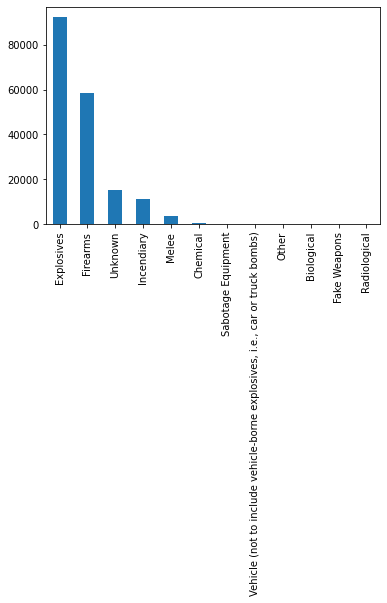

In [10]:
data.weaptype1_txt.value_counts().plot(kind='bar')

## Different regions affected

<AxesSubplot: >

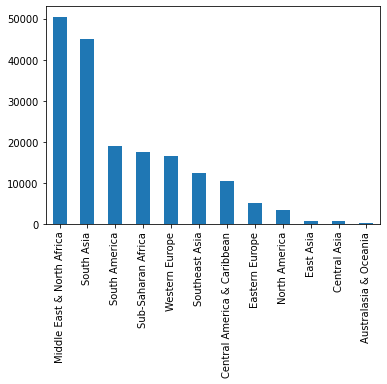

In [11]:
data.region_txt.value_counts().plot(kind='bar')

## Country affected in orders

In [12]:
data.country_txt.value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: country_txt, Length: 205, dtype: int64

## Different types of attacks

<AxesSubplot: >

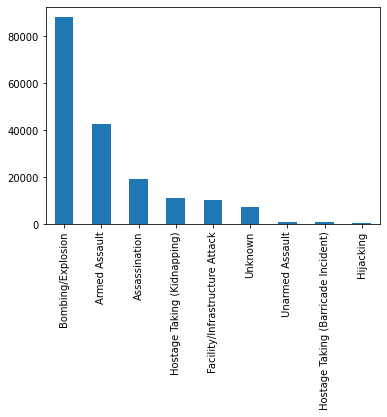

In [13]:
data.attacktype1_txt.value_counts().plot(kind='bar')

## Different types of targets

<AxesSubplot: >

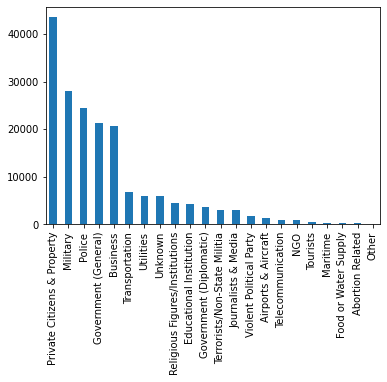

In [14]:
data.targtype1_txt.value_counts().plot(kind='bar')

## Top 5 gangs

In [15]:
gangs=dict(sorted(dict(data.gname.value_counts()).items(), key=lambda x:x[1],reverse=True))
del gangs['Unknown']
list(gangs)[:5]

['Taliban',
 'Islamic State of Iraq and the Levant (ISIL)',
 'Shining Path (SL)',
 'Farabundo Marti National Liberation Front (FMLN)',
 'Al-Shabaab']

## Attack rate over years

<AxesSubplot: >

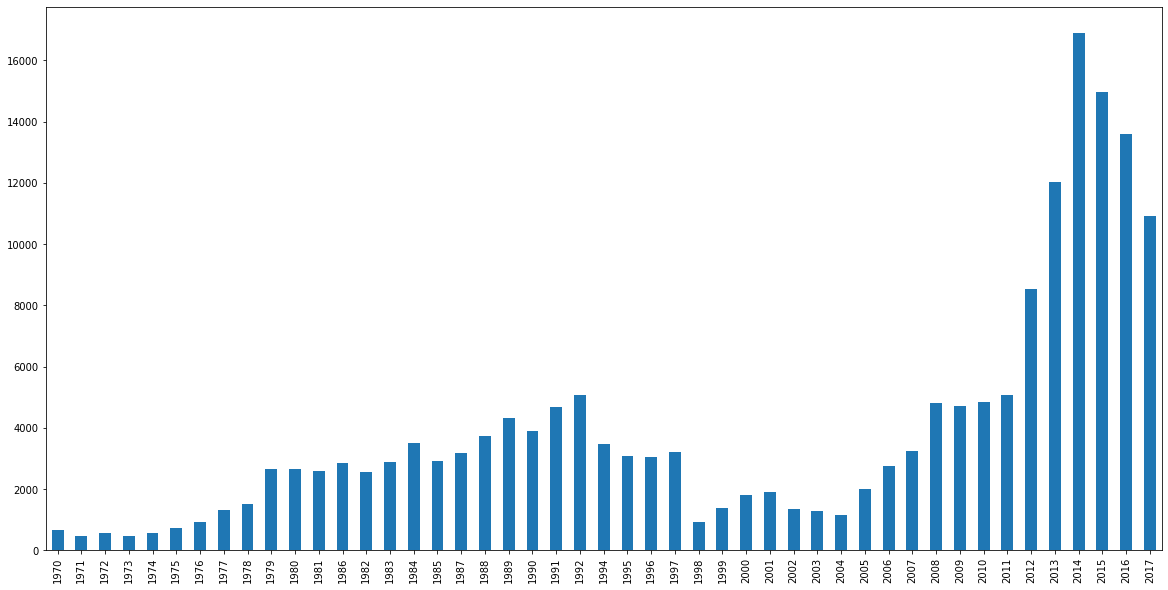

In [16]:
plt.figure(figsize=(20,10))
data.iyear.value_counts(sort=False).plot(kind="bar")

## Successfull and unsuccessfull attacks in different years

<AxesSubplot: xlabel='iyear', ylabel='count'>

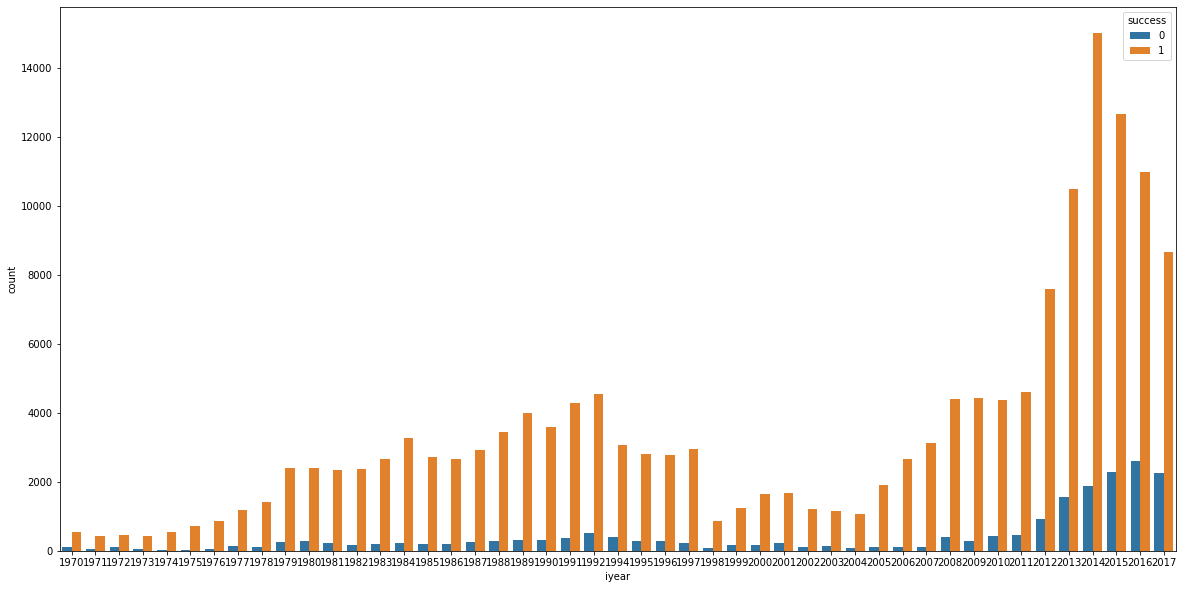

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x="iyear", hue="success")

## Attacks stopped

<AxesSubplot: xlabel='iyear'>

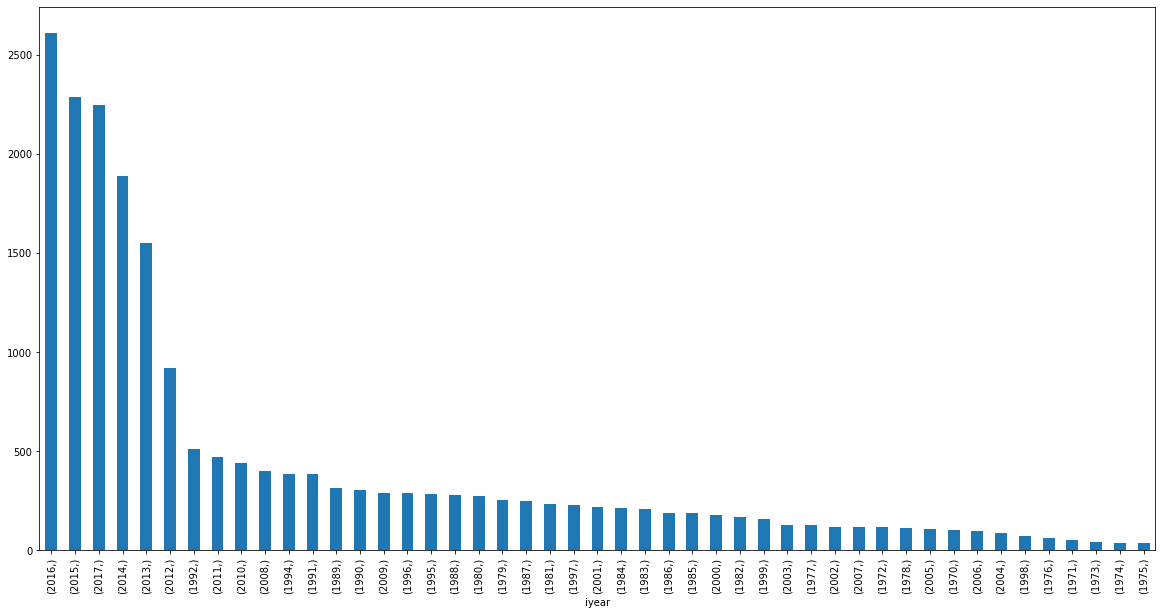

In [18]:
a=data.filter(items=['iyear', 'success'])
plt.figure(figsize=(20,10))
a=a.loc[a['success']==0]
del a["success"]
a.value_counts().plot(kind="bar")

## Viewing sources of data gathered

In [19]:
data.dbsource.value_counts()

START Primary Collection                    78002
PGIS                                        63740
ISVG                                        17207
CETIS                                       16163
CAIN                                         1588
UMD Schmid 2012                              1165
Hewitt Project                               1005
UMD Algeria 2010-2012                         848
UMD South Africa                              449
UMD Sri Lanka 2011                            405
UMD Miscellaneous                             259
Anti-Abortion Project 2010                    186
Eco Project 2010                              147
UMD JTMM Nepal 2012                           104
HSI                                            97
Hyland                                         71
Hijacking DB                                   54
UMD Encyclopedia of World Terrorism 2012       48
CBRN Global Chronology                         46
Armenian Website                               40


## Viewing affected countries

<AxesSubplot: >

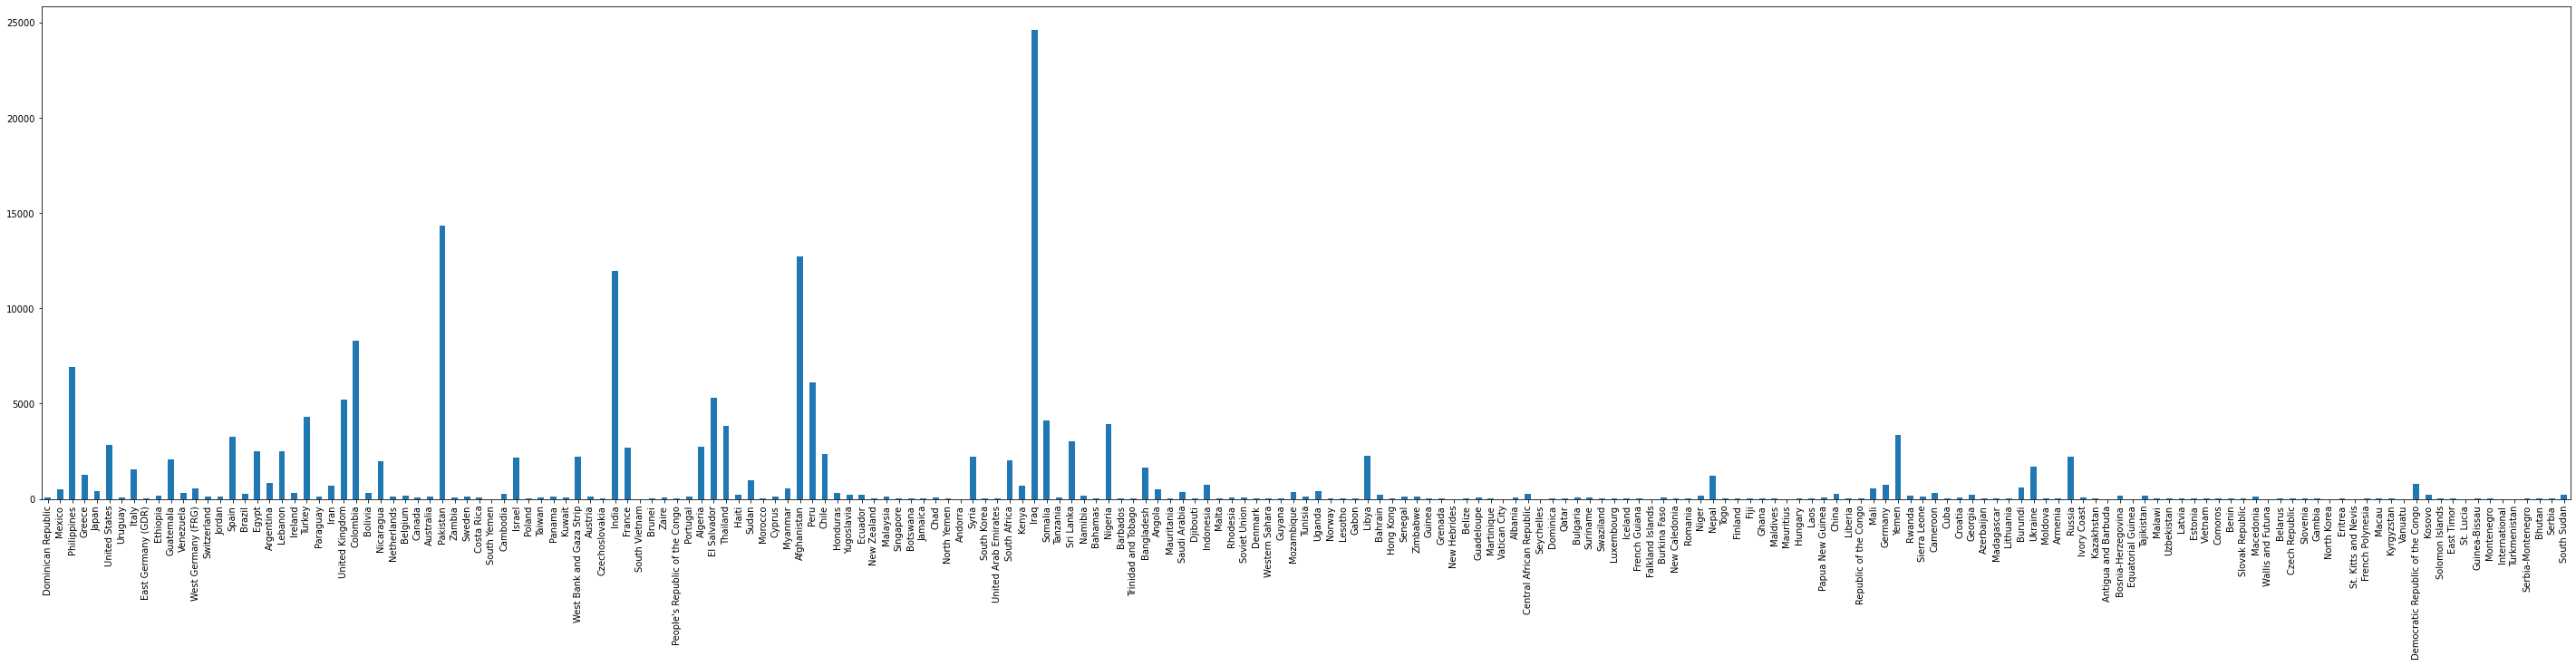

In [20]:
plt.figure(figsize=(50,10))
data.country_txt.value_counts(sort=False).plot(kind="bar")

## Most affected countries

In [21]:
a=data.country_txt.value_counts()
a[:5]

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: country_txt, dtype: int64

## Most affected region

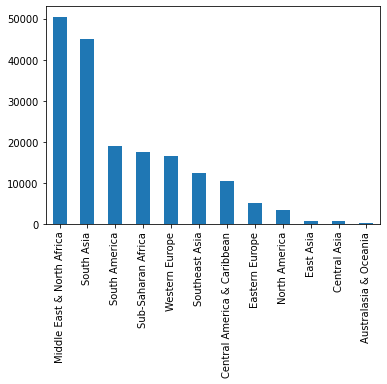

In [22]:
#most affected region
a=data.region_txt.value_counts().plot(kind="bar")

## Attacks in india

<AxesSubplot: xlabel='iyear'>

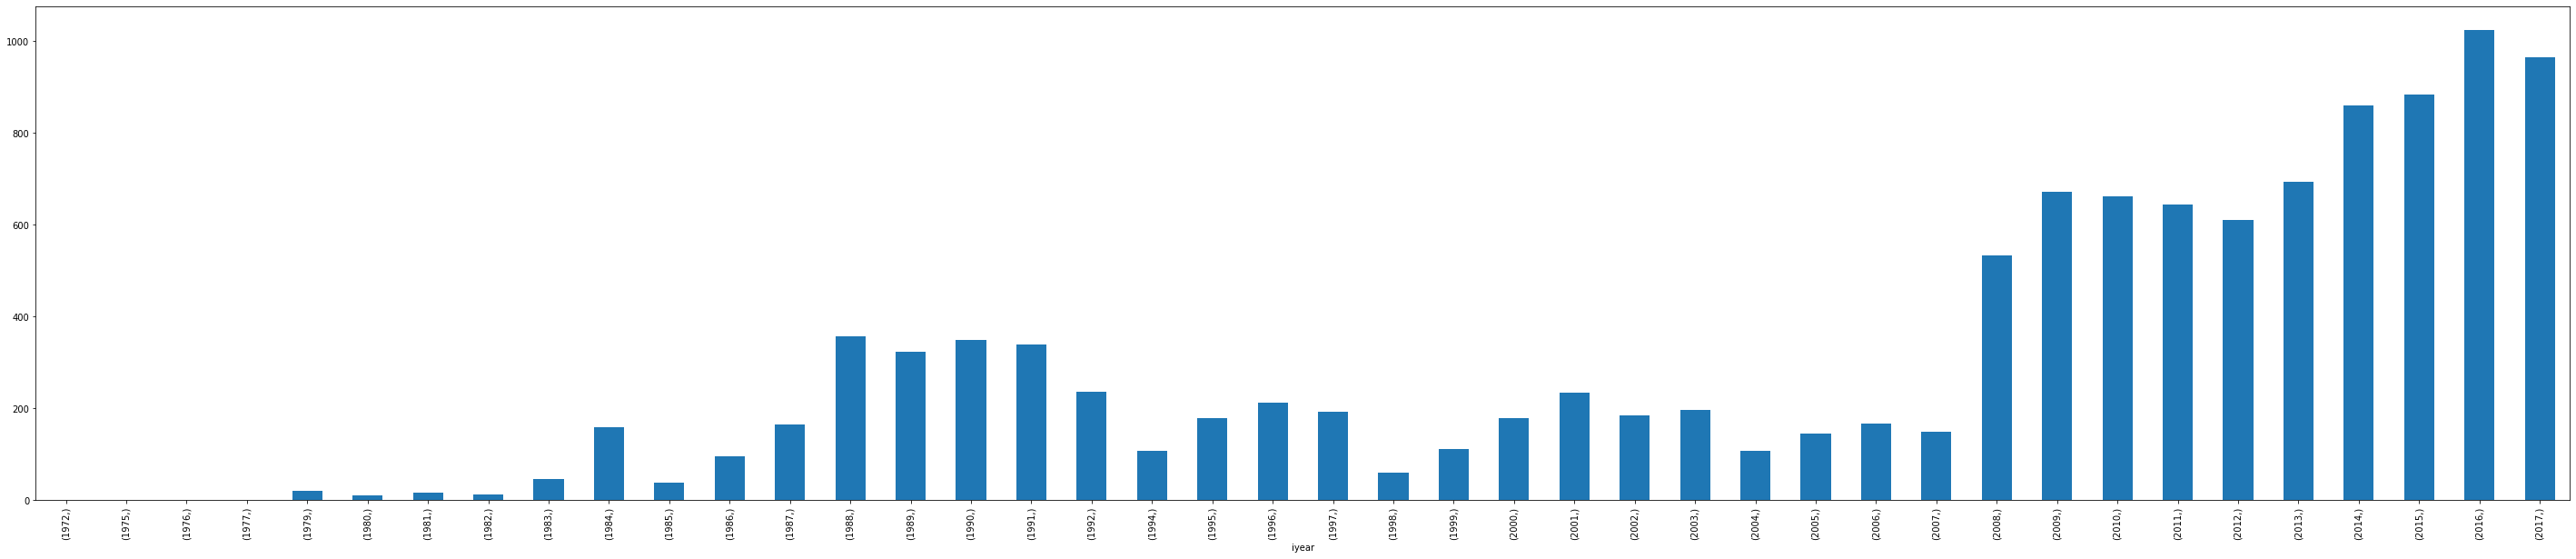

In [23]:
a=data.filter(items=['country_txt', 'iyear'])
plt.figure(figsize=(50,10))
a=a.loc[a["country_txt"]=="India"]
del a["country_txt"]
a.value_counts(sort=False).plot(kind="bar")

## Affected states in India

In [24]:
# attacks in india
a=data.filter(items=['country_txt','provstate'])
a=a.loc[a["country_txt"]=="India"]
del a["country_txt"]
a.value_counts()

provstate        
Jammu and Kashmir    2454
Assam                1151
Manipur              1100
Chhattisgarh          979
Punjab                949
Jharkhand             887
Bihar                 688
West Bengal           650
Odisha                428
Maharashtra           302
Meghalaya             294
Andhra Pradesh        251
Orissa                221
Delhi                 208
Uttar Pradesh         201
Tamil Nadu            164
Unknown               157
Tripura               117
Nagaland              115
Kerala                 98
Gujarat                85
Madhya Pradesh         75
Karnataka              71
Haryana                50
Chandigarh             47
Rajasthan              43
Andhra pradesh         41
Mizoram                27
Arunachal Pradesh      24
Himachal Pradesh       24
Telangana              24
Uttaranchal            24
Goa                     5
Sikkim                  4
Puducherry              2
dtype: int64

## top 5 damaged cities in world

In [25]:
data["spot"] = data['city'].astype(str) +","+ data["country_txt"] +","+ data["region_txt"]
city=dict(sorted(dict(data.spot.value_counts()).items(), key=lambda x:x[1],reverse=True))
for i in list(city.keys())[:5]:
    print(i,":",city[i])

Baghdad,Iraq,Middle East & North Africa : 7585
Karachi,Pakistan,South Asia : 2651
Lima,Peru,South America : 2359
Mosul,Iraq,Middle East & North Africa : 2265
Belfast,United Kingdom,Western Europe : 2170
